In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../Data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)

file read
strings converted to numbers
q-values estimated
ranks computed


In [5]:
dSlow.head()

,SpecId,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,...,precursor_purity,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,Rank
15534,controllerType=0controllerNumber=1scan=8704,1,8704,1075.096069,1075.098716,1075.096069,40,0,1,0,...,1.000000,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,1
15647,controllerType=0controllerNumber=1scan=8757,1,8757,1075.099487,1075.098716,1075.099487,40,0,1,0,...,1.000000,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,1
12279,controllerType=0controllerNumber=1scan=7273,1,7273,906.114624,906.114606,906.114624,44,0,0,1,...,0.969195,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGKSSHS.-,sp|P35527|K1C9_HUMAN,0.0,0.0,1
14073,controllerType=0controllerNumber=1scan=7991,1,7991,1336.114624,1336.114549,1336.114624,32,0,1,0,...,1.000000,0,0,0,0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,1
14191,controllerType=0controllerNumber=1scan=8046,1,8046,1336.115234,1336.114549,1336.115234,32,0,1,0,...,0.992819,0,0,0,0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,1


Training in iteration 1 with split 1 starts!
Training in iteration 1 with split 2 starts!
Training in iteration 1 with split 3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1 starts!
Training in iteration 2 with split 2 starts!
Training in iteration 2 with split 3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1 starts!
Training in iteration 3 with split 2 starts!
Training in iteration 3 with split 3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1 starts!
Training in iteration 4 with split 2 starts!
Training in iteration 4 with split 3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1 starts!
Training in iteration 5 with split 2 starts!
Training in iteration 5 with split 3 starts!
Iteration 5/10 done!
Training in iteration 6 with split 1 starts!
Training in iteration 6 with split 2 starts!
Training in iteration 6 with split 3 starts!
Iteration 6/10 done!
Training in iteration 7 with split 1 starts!
Training in iterati

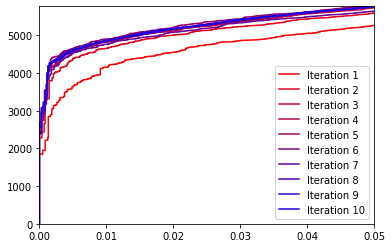

In [2]:
p = percolator(dSlow, idCol, excluded, plotEveryIter = True, plotSaveName = '../results/percolator_after_cross_validation1.png')

ValueError: x is neither increasing nor decreasing : [0.0065372  0.         0.00131291 ... 0.         0.00031133 0.        ].

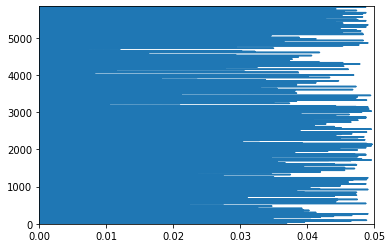

In [4]:
pseudoROC(p)

ValueError: x is neither increasing nor decreasing : [0.00079851 0.01635351 0.01709549 ... 0.02192613 0.         0.00893855].

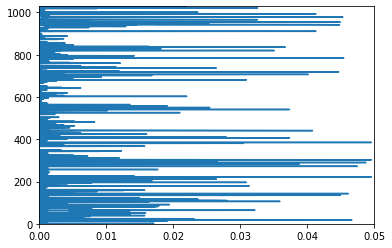

In [3]:
evalXL(p)

In [ ]:
evalXL(dSlow)